In [1]:
import os
import xarray as xr
import pandas as pd

In [2]:
input_data = xr.open_dataset("/home/khanalp/task1/data/ICOS/Input_data/BE-Lon_2012-2020_FLUXNET2015_Met.nc")

In [6]:
def list_folders_with_prefix(location, prefix):
    """
    Retrieves a list of folder names within the specified location directory that start with the provided prefix.
    
    Parameters:
        location (str): The directory path where the function will search for folders.
        prefix (str): The prefix that the desired folders should start with.
    
    Returns:
        list: A list of folder names starting with the specified prefix within the given location.
    """
    folders_with_prefix = [folder for folder in os.listdir(location) if os.path.isdir(os.path.join(location, folder)) and folder.startswith(prefix)]
    return folders_with_prefix

In [7]:
def list_csv_files_in_folder(folder_path, keyword):
    """
    Retrieves a list of file paths for CSV files within the specified folder_path directory that contain the provided keyword in their filenames.
    
    Parameters:
        folder_path (str): The directory path where the function will search for CSV files.
        keyword (str): The keyword that the filenames of desired CSV files should contain.
    
    Returns:
        list: A list of file paths for CSV files containing the specified keyword within the given folder_path.
    """
    csv_files = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.csv') and keyword in file]
    return csv_files

In [11]:
ICOS_location = "/home/khanalp/task1/data/"
prefix = "FLX"

In [12]:
folders = list_folders_with_prefix(ICOS_location, prefix)

csv_files_with_keyword = [] 
for folder in folders:
    folder_path = os.path.join(ICOS_location, folder)
    csv_files_with_keyword.extend(list_csv_files_in_folder(folder_path, "FULLSET_HH"))

In [13]:
# Assuming csv_files_with_keyword is a list of file names
keyword = "BE-Lon"
filtered_files = [file for file in csv_files_with_keyword if keyword in file]

In [14]:
insitu = pd.read_csv(filtered_files[0])

In [73]:
insitu.columns.tolist()

['TIMESTAMP_START',
 'TIMESTAMP_END',
 'TA_F_MDS',
 'TA_F_MDS_QC',
 'TA_ERA',
 'TA_F',
 'TA_F_QC',
 'SW_IN_POT',
 'SW_IN_F_MDS',
 'SW_IN_F_MDS_QC',
 'SW_IN_ERA',
 'SW_IN_F',
 'SW_IN_F_QC',
 'LW_IN_F_MDS',
 'LW_IN_F_MDS_QC',
 'LW_IN_ERA',
 'LW_IN_F',
 'LW_IN_F_QC',
 'LW_IN_JSB',
 'LW_IN_JSB_QC',
 'LW_IN_JSB_ERA',
 'LW_IN_JSB_F',
 'LW_IN_JSB_F_QC',
 'VPD_F_MDS',
 'VPD_F_MDS_QC',
 'VPD_ERA',
 'VPD_F',
 'VPD_F_QC',
 'PA',
 'PA_ERA',
 'PA_F',
 'PA_F_QC',
 'P',
 'P_ERA',
 'P_F',
 'P_F_QC',
 'WS',
 'WS_ERA',
 'WS_F',
 'WS_F_QC',
 'WD',
 'USTAR',
 'RH',
 'NETRAD',
 'PPFD_IN',
 'PPFD_DIF',
 'PPFD_OUT',
 'SW_OUT',
 'LW_OUT',
 'CO2_F_MDS',
 'CO2_F_MDS_QC',
 'TS_F_MDS_1',
 'TS_F_MDS_2',
 'TS_F_MDS_3',
 'TS_F_MDS_4',
 'TS_F_MDS_5',
 'TS_F_MDS_6',
 'TS_F_MDS_1_QC',
 'TS_F_MDS_2_QC',
 'TS_F_MDS_3_QC',
 'TS_F_MDS_4_QC',
 'TS_F_MDS_5_QC',
 'TS_F_MDS_6_QC',
 'SWC_F_MDS_1',
 'SWC_F_MDS_2',
 'SWC_F_MDS_3',
 'SWC_F_MDS_4',
 'SWC_F_MDS_5',
 'SWC_F_MDS_1_QC',
 'SWC_F_MDS_2_QC',
 'SWC_F_MDS_3_QC',
 'SWC_F_MDS

In [27]:
#selecting required variables from ICOS data for input.
variables = [
    'TIMESTAMP_START',
    'NETRAD',
    'SW_OUT',
    'LE_F_MDS',
    'H_F_MDS',
    'G_F_MDS',
    'LE_CORR',
    'H_CORR',
    'LE_CORR_JOINTUNC',
    'H_CORR_JOINTUNC',
    'USTAR',
    'NEE_VUT_REF',
    'NEE_VUT_REF_JOINTUNC',
    'GPP_NT_VUT_REF',
    'GPP_NT_VUT_SE',
    'GPP_DT_VUT_REF',
    'GPP_DT_VUT_SE',
    'RECO_NT_VUT_REF',
    'RECO_NT_VUT_SE'
]

In [28]:
#Renaming them 
rename = {'NETRAD':'Rnet',
          'SW_OUT':'SWup',
          'LE_F_MDS':'Qle',
          'H_F_MDS':'Qh',
          'G_F_MDS':'Qg',
          'LE_CORR':'Qle_cor',
          'H_CORR':'Qh_cor',
          'LE_CORR_JOINTUNC':'Qle_cor_uc',
          'H_CORR_JOINTUNC':'Qh_cor_uc',
          'USTAR':'Ustar',
          'NEE_VUT_REF':'NEE',
          'NEE_VUT_REF_JOINTUNC' : 'NEE_uc',
          'GPP_NT_VUT_REF':'GPP',
          'GPP_NT_VUT_SE':'GPP_se',
          'GPP_DT_VUT_REF':'GPP_DT',
          'GPP_DT_VUT_SE':'GPP_DT_se',
          'RECO_NT_VUT_REF':'Resp',
          'RECO_NT_VUT_SE':'Resp_se'
         }

In [29]:
# Make xraay dataaset
xds = xr.Dataset.from_dataframe(insitu)

In [30]:
# Select variables and rename them.
xds_renamed = xds[variables].rename(rename)

In [37]:
#Making date and time as index; renaming index to time
xds_indexed = xds_renamed.assign_coords(index=pd.to_datetime(xds_renamed['TIMESTAMP_START'], format='%Y%m%d%H%M')).rename({'index':'time'})
# Adding x,y to the dimensions; also dropping variable 'TIMESTAMP_START' because its already indexed
xds_dimension = xds_indexed.expand_dims({'x': [1], 'y': [2]}).drop_vars('TIMESTAMP_START')
#Converting x,y to float64 
xds_dimension['x'] = xds_dimension['x'].astype('float64')
xds_dimension['y'] = xds_dimension['y'].astype('float64')

# Assign the coordinate arrays to the dataset
xds_dimension = xds_dimension.assign_coords({'x': input_data['x'].values  , 'y': input_data['y'].values})
# Convert the desired date to a pandas Timestamp

# Get the minimum time value in the dataset
min_time = pd.Timestamp(xds_dimension.time.min().values)

# Set the start_date to 2012-01-01 if the minimum time is before 2012, otherwise keep it the same
start_date = pd.Timestamp('2012-01-01 00:00:00') if min_time < pd.Timestamp('2012-01-01') else min_time

# Select data from 'xds_dimension' after the start_date
xds_dimension = xds_dimension.sel(time=slice(start_date, None))

In [41]:
result = xr.open_dataset("/home/khanalp/STEMMUSSCOPE/STEMMUS_SCOPE/ICOS_sites/BE-Lon/output/BE-Lon_2024-03-11-1644/BE-Lon_2024-03-11-1644_STEMMUS_SCOPE.nc")

In [51]:
result

<xarray.Dataset>
Dimensions:      (time: 1488, y: 1, x: 1, z: 54)
Coordinates:
  * time         (time) datetime64[ns] 2012-01-01 ... 2012-01-31T23:30:00
  * z            (z) int64 1 2 3 4 5 6 7 8 9 10 ... 46 47 48 49 50 51 52 53 54
  * x            (x) float32 4.746
  * y            (y) float32 50.55
Data variables: (12/26)
    SWnet        (time, y, x) float32 ...
    LWnet        (time, y, x) float32 ...
    SWdown       (time, y, x) float32 ...
    LWdown       (time, y, x) float32 ...
    SWup         (time, y, x) float32 ...
    LWup         (time, y, x) float32 ...
    ...           ...
    Tair         (time, y, x) float32 ...
    Psurf        (time, y, x) float32 ...
    Wind         (time, y, x) float32 ...
    Precip       (time, y, x) float32 ...
    NEE          (time, y, x) float32 ...
    Rnet         (time, y, x) float32 ...
Attributes:
    model:         STEMMUS_SCOPE
    institution:   University of Twente; Northwest A&F University
    contact:       Zhongbo Su, z.su@utwente.nl; Yijian Zeng, y.zeng@utwente.n...
    license_type:  CC BY 4.0
    license_url:   https://creativecommons.org/licenses/by/4.0/
    latitude:      50.55162
    longitude:     4.746234

In [ ]:
sel(time=slice(start_time, end_time))

In [48]:
selected_flux = xds_dimension.sel(time = slice(result.time.values.min(),result.time.values.max()))

In [56]:
selected_flux

<xarray.Dataset>
Dimensions:     (x: 1, y: 1, time: 1488)
Coordinates:
  * x           (x) float64 4.746
  * y           (y) float64 50.55
  * time        (time) datetime64[ns] 2012-01-01 ... 2012-01-31T23:30:00
Data variables: (12/18)
    Rnet        (x, y, time) float64 -9.999e+03 -9.999e+03 ... -85.2 -87.4
    SWup        (x, y, time) float64 -9.999e+03 -9.999e+03 ... 2.4 2.3
    Qle         (x, y, time) float64 -1.056 0.2029 0.2029 ... 1.509 1.609 1.555
    Qh          (x, y, time) float64 -16.59 -30.73 -19.93 ... -9.28 -9.098
    Qg          (x, y, time) float64 -7.938 -7.405 -6.782 ... -13.89 -13.86
    Qle_cor     (x, y, time) float64 -0.4228 0.08352 0.08352 ... 3.153 3.048
    ...          ...
    GPP         (x, y, time) float64 -0.8926 -0.3278 ... -0.07581 -0.07878
    GPP_se      (x, y, time) float64 0.003239 0.003259 ... 0.004402 0.004394
    GPP_DT      (x, y, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    GPP_DT_se   (x, y, time) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    Resp        (x, y, time) float64 0.7721 0.7732 0.7744 ... 0.4868 0.4838
    Resp_se     (x, y, time) float64 0.003239 0.003259 ... 0.006907 0.006889

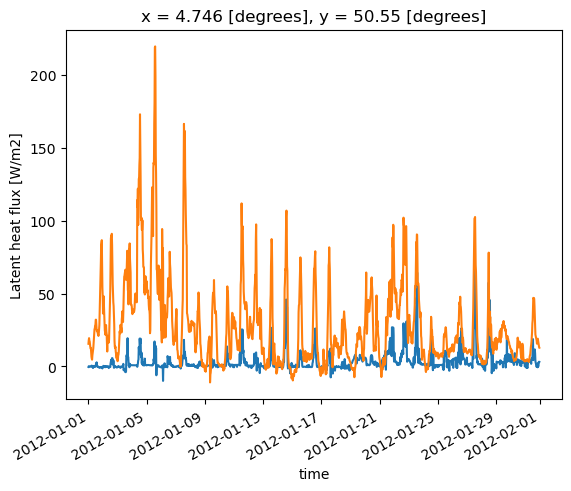

In [52]:
selected_flux.Qle_cor.plot()
result.Qle.plot()

In [67]:
def kgCO2_to_umolCO2(kgCO2):
    # Convert kilograms to grams
    gramsCO2 = kgCO2 * 1000
    
    # Convert grams to moles
    molesCO2 = gramsCO2 / 44.01  # Molecular weight of CO2 is 44.01 g/mol
    
    # Convert moles to umol
    umolCO2 = molesCO2 * 1e6
    
    return umolCO2

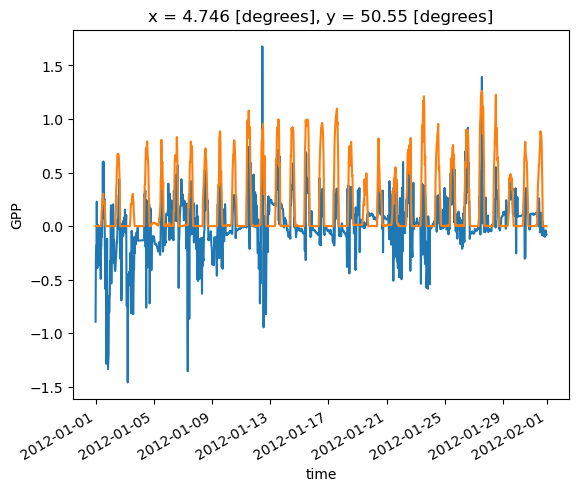

In [72]:
selected_flux.GPP.plot()
kgCO2_to_umolCO2(result.GPP).plot()
#result.GPP.plot()

In [3]:
initial_condition = xr.open_dataset("/home/khanalp/task1/data/ICOS/Initial_condition/IT-Lsn_2016-01-01_InitialCondition.nc")

In [92]:
initial_condition.time.values

numpy.datetime64('2018-01-01T00:00:00.000000000')

In [69]:
# Check for variables with value -9999 and count NaN values
missing_variables = {}

for var in input_data.data_vars:
    # Count occurrences of -9999 and NaN values
    missing_values_count = input_data[var].isin([-9999]).sum() + input_data[var].isnull().sum()
    if missing_values_count > 0:
        missing_variables[var] = missing_values_count

# Print the missing variables and count, if any
if missing_variables:
    print("Variables with missing values (-9999 and NAs) and their counts:")
    for var, count in missing_variables.items():
        print(f"{var}: {count}")
else:
    print("No variables with missing values (-9999 and NAs) found.")

Variables with missing values (-9999 and NAs) and their counts:
CO2air_qc: <xarray.DataArray 'CO2air_qc' ()>
array(5187)


In [75]:
# Check for missing variables
missing_variables = []

for var in input_data.data_vars:
    if input_data[var].isnull().any():
        missing_variables.append(var)

# Print the missing variables, if any
if missing_variables:
    print("Missing variables:")
    for var in missing_variables:
        print(var)
else:
    print("No missing variables found.")


No missing variables found.
